In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt


Самоубийства являются острым вопросом в социальной и экономической сфере и требуют исследований, которые в дальнейшем помогут лучше понимать тендеции и то как коррелируют всплески суицидальных происшествий с другими данными общественной жизни. 
Рассмотрим DataSet от Всемирной Организации Здравоохранения с данными за 1990 по 2015 год. 

Text(0, 0.5, 'Количество самоубийств')

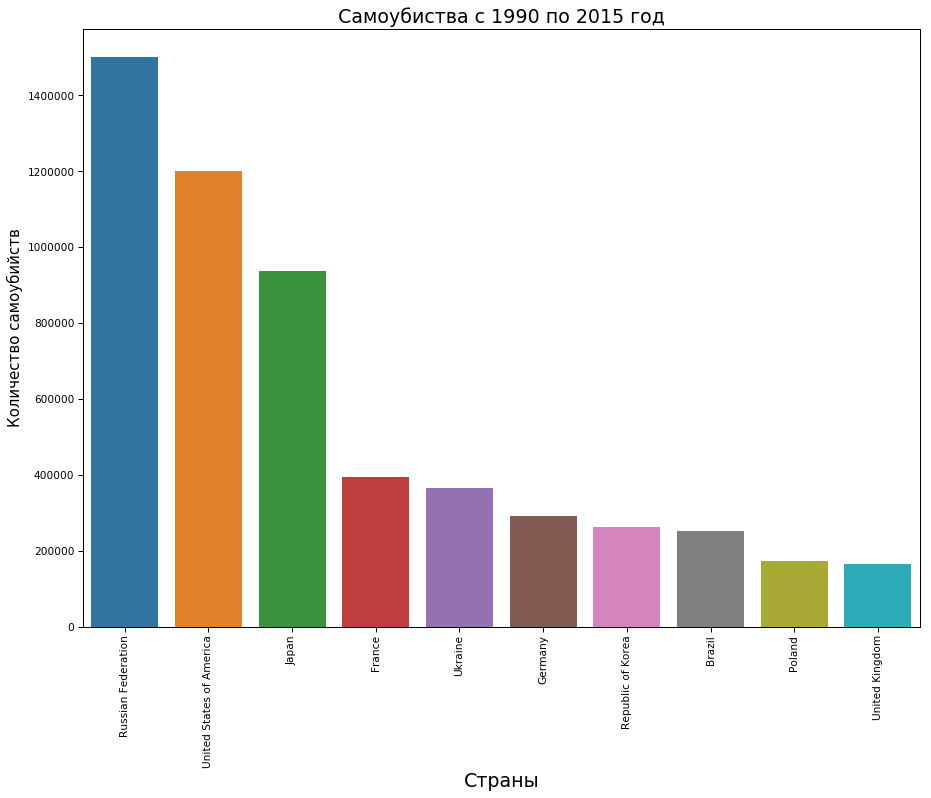

In [22]:
suicide_data = pd.read_csv('who_suicide_statistics.csv')
hum_dev_data = pd.read_csv('datasets_65855_129601_Human Development Index.csv')

new_sui = pd.DataFrame(suicide_data.groupby(['country'])['suicides_no'].sum().reset_index())
new_sui.sort_values(by=['suicides_no'], ascending = False, inplace = True)


fig, ax = plt.subplots()
fig.set_size_inches(15,11)
ax.set_xticklabels(new_sui['country'].head(10), rotation = 90)

sns.set_context('paper', font_scale = 1.2)
sns.barplot(x= new_sui['country'].head(10), y = new_sui['suicides_no'].head(10), data = new_sui)
ax.set_title('Самоубиства с 1990 по 2015 год', fontsize = 19)
ax.set_xlabel('Страны', fontsize = 19)
ax.set_ylabel('Количество самоубийств', fontsize = 15)



In [56]:

suicide_data['Percentage'] = suicide_data['suicides_no']/ suicide_data['population']
amount_sui = suicide_data.groupby(['country', 'year'])['population'].sum().reset_index()

amount_percentage = suicide_data.groupby(['country', 'year'])['Percentage'].sum().reset_index()

amount_percentage_sex = suicide_data.groupby(['country', 'year', 'sex'])['Percentage'].sum().reset_index()


Из общей выборки выделим Топ-10 стран по колличеству суицидов
 
Тепрерь посмотрим как изменялся разброс данных во времени


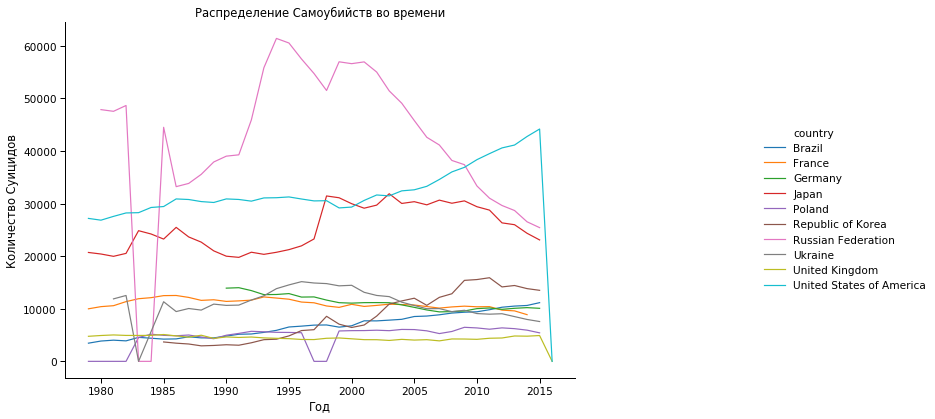

In [24]:
top_country = new_sui['country'].head(10)
sui_in_year = pd.DataFrame(suicide_data.groupby(['country','year'])['suicides_no'].sum().reset_index())
R = sui_in_year[sui_in_year['country'].isin(top_country)]
J = sui_in_year[sui_in_year['country']== 'Japan']
Rus = sui_in_year[sui_in_year['country']== 'Russian Federation']
Fra = sui_in_year[sui_in_year['country']== 'France']
Usa = sui_in_year[sui_in_year['country']== 'United States of America']

sns.set_context('paper', font_scale = 1.2)
f = sns.relplot(x = 'year', y = 'suicides_no', hue = 'country', data = R, kind = 'line', ci = None)
f.fig.set_size_inches(15,6)
f.set_xlabels('Год')
f.set_ylabels('Количество Суицидов')
plt.title('Распределение Самоубийств во времени')
sns.set_context('paper', font_scale = 1.2)

In [111]:

new_dev_data = hum_dev_data.melt(id_vars = ['HDI Rank','Country'], var_name = 'Year')


In [26]:
new_dev_data.groupby(['Country','Year'])['value'].sum().reset_index()
N = new_dev_data[new_dev_data['Country'] == ' Japan']
U = new_dev_data[new_dev_data['Country'] == ' United States']
RUS = new_dev_data[new_dev_data['Country'] == ' Russian Federation']
FRA = new_dev_data[new_dev_data['Country'] == ' France']


#sns.set_style('whitegrid')
#H = sns.relplot(x = 'Year', y = 'value', data = N, kind = 'line')

#H.fig.set_size_inches(10,8)
#H.set_xticklabels(N['Year'], rotation = 70)
#H.set_xlabels('Год')
#H.set_ylabels('Индекс Человеческого Развития')
#plt.title('График зависимости ИЧР от года в Японии')

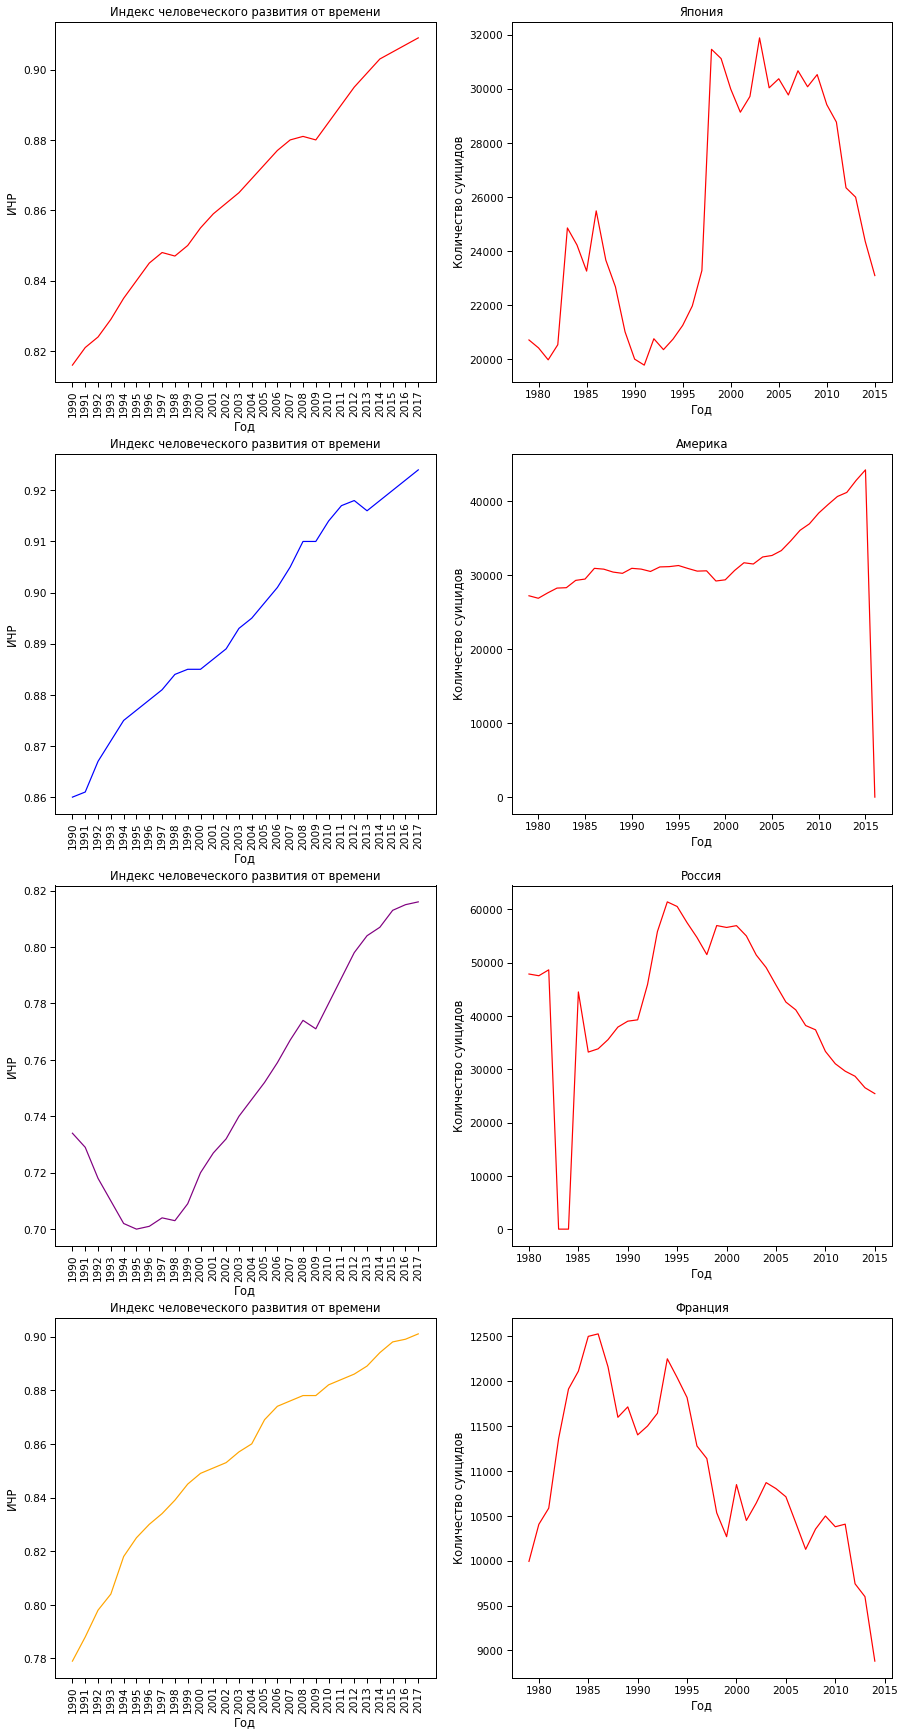

In [27]:
plt.figure(figsize=(15,8))
fx = plt.subplot(4, 2, 1)
plt.plot(N['Year'],N['value'],color = 'red')
plt.xlabel('Год')
plt.ylabel('ИЧР')
plt.title('Индекс человеческого развития от времени')
fx.set_xticklabels(N['Year'], rotation = 90)
fx2 = plt.subplot(4, 2, 2)
plt.plot(J['year'],J['suicides_no'],color = 'red')
plt.xlabel('Год')
plt.ylabel('Количество суицидов')
plt.title('Япония')
fx3 = plt.subplot(4,2,3)
plt.plot(U['Year'],U['value'],color = 'blue')
plt.xlabel('Год')
plt.ylabel('ИЧР')
plt.title('Индекс человеческого развития от времени')
fx3.set_xticklabels(N['Year'], rotation = 90)
fx4 = plt.subplot(4,2,4)
plt.plot(Usa['year'],Usa['suicides_no'],color = 'red')
plt.xlabel('Год')
plt.ylabel('Количество суицидов')
plt.title('Америка')

fx5 = plt.subplot(4,2,5)
plt.plot(RUS['Year'],RUS['value'],color = 'purple')
plt.xlabel('Год')
plt.ylabel('ИЧР')
plt.title('Индекс человеческого развития от времени')
fx5.set_xticklabels(N['Year'], rotation = 90)
fx6 = plt.subplot(4,2,6)
plt.plot(Rus['year'],Rus['suicides_no'], color = 'red')
plt.xlabel('Год')
plt.ylabel('Количество суицидов')
plt.title('Россия')
fx7 = plt.subplot(4,2,7)
plt.plot(FRA['Year'],FRA['value'],color = 'orange')
plt.xlabel('Год')
plt.ylabel('ИЧР')
plt.title('Индекс человеческого развития от времени')
fx7.set_xticklabels(N['Year'], rotation = 90)
fx8 = plt.subplot(4,2,8)
plt.plot(Fra['year'],Fra['suicides_no'],color = 'red')
plt.xlabel('Год')
plt.ylabel('Количество суицидов')
plt.title('Франция')
plt.subplots_adjust(top = 3)


Расчитаем процент суицидов относительно населения стран и сравним данные 

0.02419184476433986


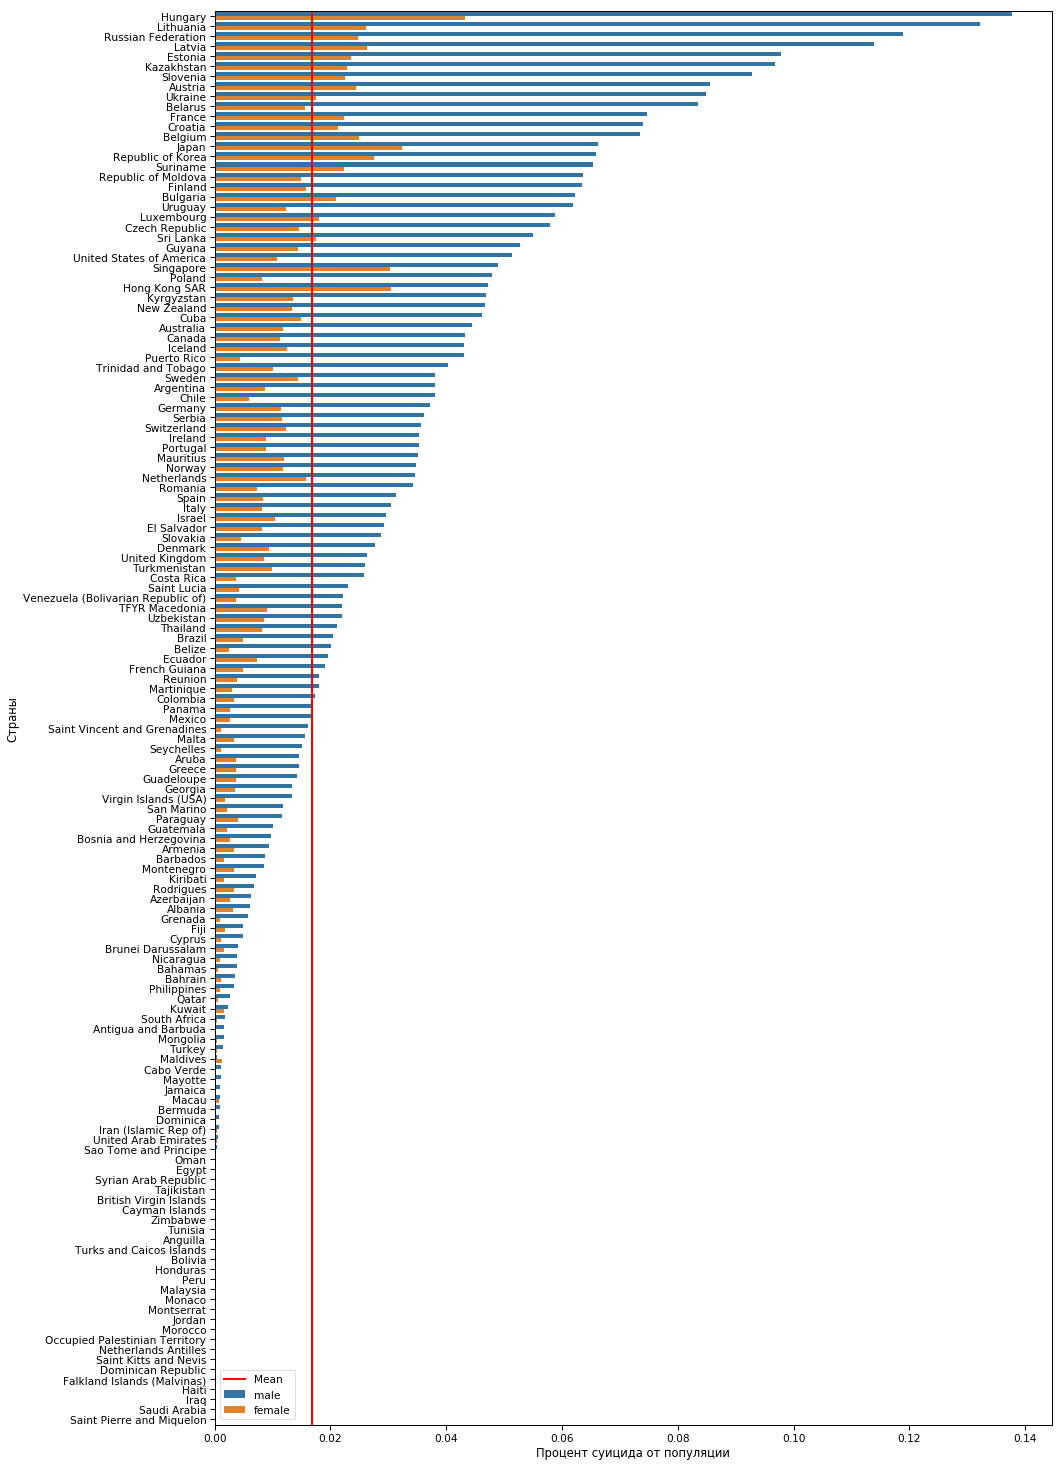

In [91]:
amount_percentage2 = suicide_data.groupby(['country'])['Percentage'].sum().reset_index()
amount_perc_sex = suicide_data.groupby(['country','sex'])['Percentage'].sum().reset_index()
amount_percentage2.sort_values(by = ['Percentage'], ascending = False, inplace = True)
amount_perc_sex.sort_values(by = ['Percentage'], ascending = False, inplace = True)
bar, percentage_plot = plt.subplots()
percentage_plot = sns.barplot(x = 'Percentage', y = 'country', hue = 'sex', data = amount_perc_sex)
bar.set_size_inches(15,26)
percentage_plot.set_xlabel('Процент суицида от популяции')
percentage_plot.set_ylabel('Страны')
mean_sui = np.mean(amount_perc_sex['Percentage'])
std_sui = np.std(amount_perc_sex['Percentage'])
print(std_sui)
percentage_plot.axvline(mean_sui, color='r', linestyle='solid', linewidth=2, label="Mean")
plt.legend()

Страны прибалтики, восточной европы и бывшего СССР лидируют при расчете процента от общего количества населения. Россия все еще находится в Топ - 3 среди всех стран. Мужчин среди общего числа - большинство, но в Азиатских развитых странах соотношение более равное. 



<Figure size 1080x1080 with 0 Axes>

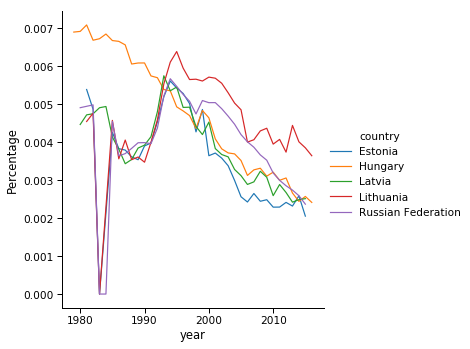

In [108]:
perc_in_year = suicide_data.groupby(['country','year'])['Percentage'].sum().reset_index()
top_country = amount_percentage2['country'].head(5)
p_in_y = perc_in_year[perc_in_year['country'].isin(top_country)]
hung_in_year = perc_in_year[perc_in_year['country'] == 'Hungary']
plt.figure(figsize=(15,15))
sns.relplot(x = 'year', y = 'Percentage' , hue = 'country' , data = p_in_y, kind = 'line', ci = None)
        

Рассмотрим распределение тенденций по возрасту 


           age  Percentage
0  15-24 years    0.529334
1  25-34 years    0.747513
2  35-54 years    0.926315
3   5-14 years    0.037920
4  55-74 years    1.009991
5    75+ years    1.503471


Text(0.5, 1.0, 'Соотношение возраста самоубийц во всем мире')

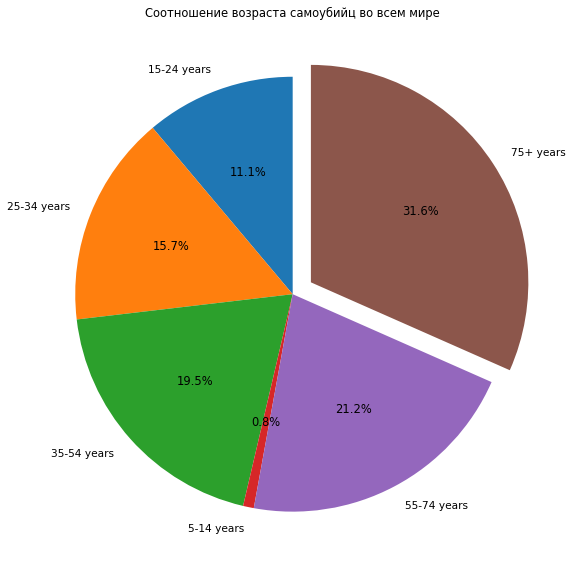

In [55]:
age_sum = suicide_data.groupby(['age'])['Percentage'].sum().reset_index()
print(age_sum)
explode = (0,0,0,0,0,0.1)
plt.figure(figsize=(10,10))
plt.pie(age_sum['Percentage'], labels = age_sum['age'], explode = explode , autopct='%1.1f%%', startangle = 90)
plt.title('Соотношение возраста самоубийц во всем мире')

В среднем по миру, как мы видим, чем старше человек, тем больший риск суицида. Скорее всего это связано с болезнями, которые развиваются к преклонному возрасту и, как следствие, невыносимыми мучениями. Также возможно нарушение внутримозговой гормональной регуляции, приводящее к депрессиям.  
Попробуем сравнить тенденции в странах европы и азии. 

Text(0.5, 1.0, 'Сравнение ')

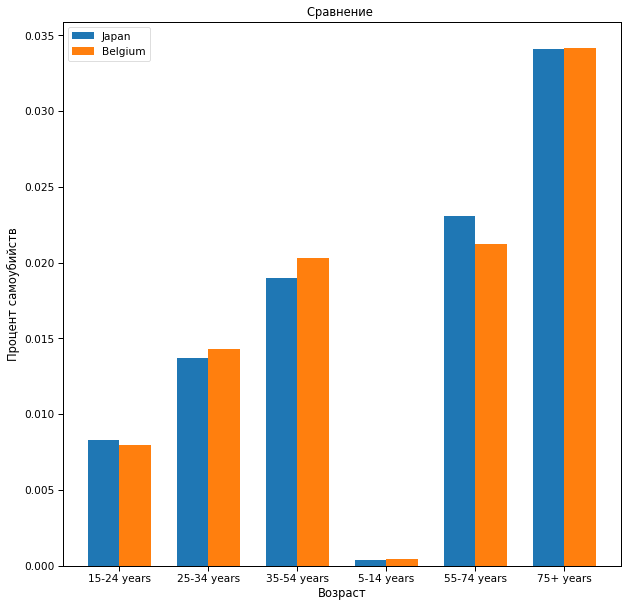

In [75]:
age_country_sum = suicide_data.groupby(['country', 'age'])['Percentage'].sum().reset_index()

Japan = age_country_sum[age_country_sum['country'] == 'Japan']
Hungary = age_country_sum[age_country_sum['country'] == 'Belgium']
age_f, p1 = plt.subplots()
age_f.set_size_inches(10,10)
n_bins = np.arange(6)
width = 0.35
p2 = p1.bar(n_bins - width/2, Japan['Percentage'], width, label = 'Japan')
p3 = p1.bar(n_bins + width/2, Hungary['Percentage'], width, label = 'Belgium')
p1.set_ylabel('Процент самоубийств')
p1.set_xlabel('Возраст')
p1.set_xticks(range(len(Japan['age'])))
p1.set_xticklabels(Japan['age'])
p1.legend()
p1.set_title('Сравнение ')

Япония и Бельгия имеет примерно одинаковые показатели процента самоубийств от общего количества населения и распределение информации по возраству соблюдает относительный паритет. Этот показатель находится вне влияния культуры и общества. 

In [ ]:
greed search